In [1]:
# Three Observable Trends
# The aggregate of each news organization's tweets were consitently close to neutral but always negative sentiment.
# The BBC had tweets with the most negative overall sentiment and the NYT had tweets closest to neutral. 
# All news organizations had a wide spread of tweet sentiments reaching high and low on the scale. 

In [2]:
import tweepy
import json
from config4 import access_token, access_token_secret, consumer_key, consumer_secret
from pprint import pprint
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
analyzer = SentimentIntensityAnalyzer()

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Define which Twitter accounts to pull from: 
news_organizations = ['BBCWorld', 'CBSNews', 'CNN', 'FoxNews', 'NYTIMES']

In [5]:
# Grab the Vader Analysis scores for the most recent 100 tweets for each account:
source = []
tweet_times = []
tweet_text = []

comp_scores = []
pos_scores = []
neu_scores = []
neg_scores = []

for account in news_organizations: 
    public_tweets = api.user_timeline(account, count=100)
    for tweet in public_tweets:
        
        source.append(account)
        tweet_times.append(tweet['created_at'])
        tweet_text.append(tweet['text'])
        
        #Analyzed Data
        analyzed = analyzer.polarity_scores(tweet['text'])
        comp_scores.append(analyzed['compound'])
        pos_scores.append(analyzed['pos'])
        neu_scores.append(analyzed['neu'])
        neg_scores.append(analyzed['neg'])

In [6]:
# Add all of the data into a dataframe. 

analysis_df = pd.DataFrame(data= source, columns=["Source"])
analysis_df['Time Stamp'] = tweet_times
analysis_df['Tweet Text'] = tweet_text
analysis_df['Compound Score'] = comp_scores
analysis_df['Positive Score'] = pos_scores
analysis_df['Neutral Score'] = neu_scores
analysis_df['Negative Score'] = neg_scores
analysis_df.to_csv("tweet_sentiment_analysis.csv")
analysis_df.head()

,Source,Time Stamp,Tweet Text,Compound Score,Positive Score,Neutral Score,Negative Score
0,BBCWorld,Fri Mar 09 16:15:15 +0000 2018,Mauritius President Gurib-Fakim to resign over...,-0.6486,0.0,0.569,0.431
1,BBCWorld,Fri Mar 09 16:09:23 +0000 2018,Catalonia Spain: Judge refuses to release Jord...,0.0000,0.0,1.000,0.000
2,BBCWorld,Fri Mar 09 15:54:43 +0000 2018,Big cat gets CAT scan https://t.co/tl0hN1flxT,0.0000,0.0,1.000,0.000
3,BBCWorld,Fri Mar 09 15:43:09 +0000 2018,"@jvn ""Yaass Queen!"" 🙌",0.0000,0.0,1.000,0.000
4,BBCWorld,Fri Mar 09 14:49:43 +0000 2018,RT @BBC_HaveYourSay: “Orange is the new Barack...,0.0000,0.0,1.000,0.000


In [7]:
# Separate the scores into individual lists by organization: 

bbc_tweet_scores = comp_scores[0:100]
cbs_tweet_scores = comp_scores[100:200]
cnn_tweet_scores = comp_scores[200:300]
fox_tweet_scores = comp_scores[300:400]
nytimes_tweet_scores = comp_scores[400:500]

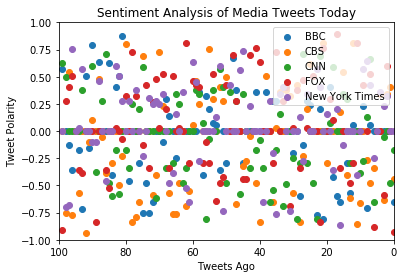

In [8]:
# Graph the Compound Sentiment Scores in a Scatter Plot

x_values = np.arange(0,len(bbc_tweet_scores), 1)
plt.scatter(x_values, bbc_tweet_scores, label = "BBC")
plt.scatter(x_values, cbs_tweet_scores, label = "CBS")
plt.scatter(x_values, cnn_tweet_scores, label = "CNN")
plt.scatter(x_values, fox_tweet_scores, label = "FOX")
plt.scatter(x_values, nytimes_tweet_scores, label = "New York Times")


plt.legend()
plt.title("Sentiment Analysis of Media Tweets Today")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.xlim(100, 0)
plt.ylim(-1,1)
plt.show()
plt.savefig("sentiment_analysis_over_time.png")


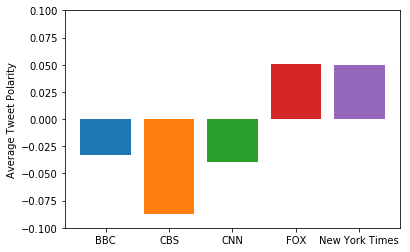

In [10]:
# Graph Average of Compound Sentiment Scores in a Bar Chart

names = ["BBC", "CBS", "CNN", "FOX", "New York Times"]
x_pos = np.arange(len(names))
plt.bar(0, np.mean(bbc_tweet_scores))
plt.bar(1, np.mean(cbs_tweet_scores))
plt.bar(2, np.mean(cnn_tweet_scores))
plt.bar(3, np.mean(fox_tweet_scores))
plt.bar(4, np.mean(nytimes_tweet_scores))
plt.xticks(x_pos, names)
plt.ylabel("Average Tweet Polarity")
plt.ylim(-.1, .1)
plt.show()
plt.savefig("tweet_polarity_by_organization")